In [ ]:
# AUTHOR: Dhanashri Patil (dpatil@cs.stonybrook.edu)
# Task: Analysis of Crypoto-Currency dataset

In [2]:
import utils
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from pandas.core import datetools
from statsmodels.graphics.tsaplots import plot_acf
from pandas.core import datetools
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import pandas.tseries
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')
%matplotlib inline

In [3]:
def my_corr(nData):
    x = nData.values
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    scaledData = pd.DataFrame(x_scaled, columns = list(nData.columns))

    corr = scaledData.corr()
    fig, ax = plt.subplots(figsize=(10,10))  
    sns.heatmap(corr, 
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values)

In [4]:
def error(pred, test):
    perc_err = 0
    for i in range(len(pred)):
        perc_err += (abs(pred[i] - test[i][0]) / test[i][0] * 100)
    print(perc_err / len(test))

In [5]:
def plot_a(x, plot):
    
    n = len(x)
    x.sort()
    x_a = []
    y_a = []
    y_curr = 0
    
    # Prepending 0's to make graph start from 0
    x_a.append(0)
    y_a.append(0)
    
    for i in x:
        y_curr += 1/n
        y_a.append(y_curr)
        x_a.append(i)
        
    # Removing prepended 0's from x_a and y_a
    x_a = x_a[1:]
    y_a = y_a[1:]
    
    return (x_a, y_a)

In [6]:
def plot(pred, test):
    plt.figure(figsize=(8,8), dpi=100)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.title("Prediction vs Actual data", fontsize = 15)
    plt.xlabel("Data Points", fontsize = 15)
    plt.ylabel("Bitcoin Closing Price", fontsize = 15)
    test = list(test.reshape(-1))
    
    plt.plot(pred)
    plt.plot(test)
    plt.legend(['Prediction', 'Actual'], prop={'size': 15})
    plt.savefig('ts_ar.jpg', bbox_inches='tight')
    plt.show()

In [7]:
def Seasonal(train, test, s):
    pred = []
    for i in range(len(test)):
        pred.append(train[i - s][0])
    return pred

In [8]:
def EWMA(train, test, alpha):
    pred = [train[-1][0]]
    for i in range(test.shape[0] - 1):
        n_pred = alpha * test[i][0] + (1 - alpha) * pred[i]
        pred.append(n_pred)
    return pred

In [10]:
def ARmod(train, test, p):
    Y = train[p:]
    X = []
    pred = []
    init_y = train[:p].reshape(-1)
    init_y = np.flip(init_y, 0)
    X.append(np.insert(init_y, 0, 1))
    for i in range(Y.shape[0] - 1):
        init_y = np.roll(init_y, 1)
        init_y[0] = Y[i][0]
        X.append(np.insert(init_y, 0, 1))
    beta = MultipleLinearRegression(np.asarray(X), Y)
    for i in range(test.shape[0]):
        init_y = np.roll(init_y, 1)
        init_y[0] = Y[-1][0]
        new_x = np.insert(init_y, 0, 1)
        pred.append(beta.T.dot(new_x)[0])
        X.append(new_x)
        Y = np.append(Y, test[i])
        Y = Y.reshape(-1, 1)
        beta = MultipleLinearRegression(np.asarray(X), Y)
    return pred

In [12]:
def MultipleLinearRegression(X,Y):
    temp1 = X.T.dot(X)
    temp2 = X.T.dot(Y)
    temp1 = np.linalg.inv(temp1)
    beta_hat = temp1.dot(temp2)
    return(beta_hat)

In [13]:
#Reading data from the input directory for bitcoin price
bitcoin_price = pd.read_csv('/Users/dhanashri/Documents/Probs-stats/project/dataset/cryptocurrencypricehistory/bitcoin_price.csv', header=0, parse_dates=['Date'])
bitcoin_price['Date'] = pd.to_datetime(bitcoin_price['Date'])
bitcoin_price.head(10)
df1 = pd.DataFrame(bitcoin_price, columns=['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'])
df011 = df1[['Date','Close']]
df011=df011.rename(columns={"Close": "btc_close"})

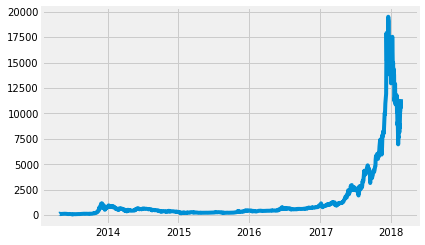

Predicted Value of lambda assuming exponential distribution:
0.0006730621027671602


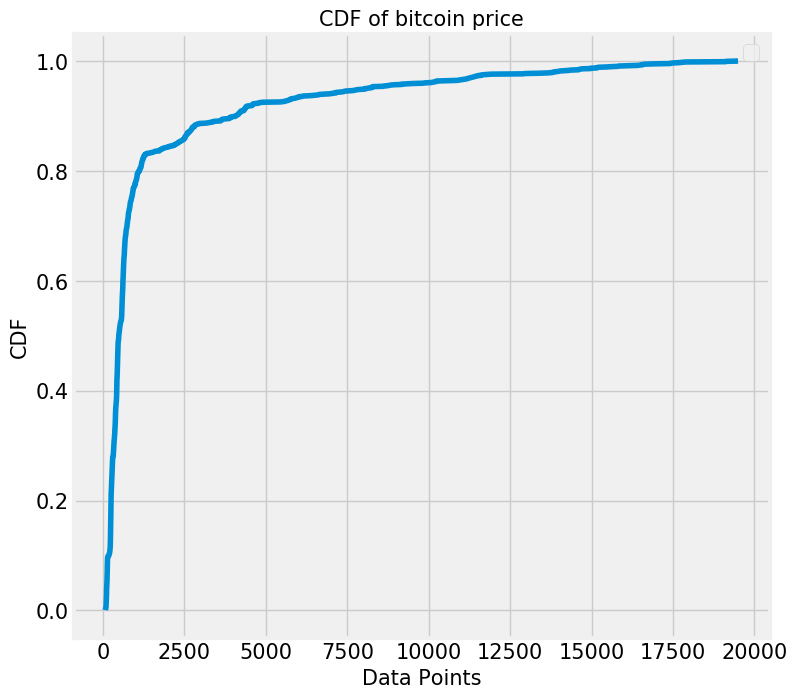

In [14]:
#(Parametric Inference) Estimated MME parameter of exponential distribution of bitcoin close price.
btc_close = np.array(bitcoin_price['Close'])
plt.plot(bitcoin_price['Date'], btc_close)
plt.show()

l_inverse = np.mean(btc_close)

l = 1.0/l_inverse
print("Predicted Value of lambda assuming exponential distribution:")
print(l)
x_a1, y_a1 = plot_a(btc_close, 1)

plt.figure(figsize=(8,8), dpi=100)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title("CDF of bitcoin price", fontsize = 15)
plt.xlabel("Data Points", fontsize = 15)
plt.ylabel("CDF", fontsize = 15)
plt.legend(['CDF'], prop={'size': 15})
plt.plot(x_a1, y_a1)
plt.savefig('cdf1.jpg', bbox_inches='tight')
plt.show()

In [15]:
#Time Series Analysis
#Reading data from the input directory for ethereum price
ethereum_price = pd.read_csv('/Users/dhanashri/Documents/Probs-stats/project/dataset/cryptocurrencypricehistory/ethereum_price.csv', header=0, parse_dates=['Date'])
ethereum_price['Date'] = pd.to_datetime(ethereum_price['Date'])
ethereum_price.head(10)
df2 = pd.DataFrame(ethereum_price, columns=['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'])
#print(df2)
df21 = df2[['Date','Close']]
df21=df21.rename(columns={"Close": "eth_close"})
#print (df21.columns)

In [17]:
#Reading data from the input directory for dash price
dash_price = pd.read_csv('/Users/dhanashri/Documents/Probs-stats/project/dataset/cryptocurrencypricehistory/dash_price.csv', header=0, parse_dates=['Date'])
dash_price['Date'] = pd.to_datetime(dash_price['Date'])
dash_price.head(10)
df3 = pd.DataFrame(dash_price, columns=['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'])
#print(df3)
df31 = df3[['Date','Close']]
df31=df31.rename(columns={"Close": "dash_close"})

In [18]:
#Reading data from the input directory for iota price
iota_price = pd.read_csv('/Users/dhanashri/Documents/Probs-stats/project/dataset/cryptocurrencypricehistory/iota_price.csv', header=0, parse_dates=['Date'])
iota_price['Date'] = pd.to_datetime(iota_price['Date'])
iota_price.head(10)
df4 = pd.DataFrame(iota_price, columns=['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'])
#print(df4)
df41 = df4[['Date','Close']]
df41=df41.rename(columns={"Close": "iota_close"})

In [19]:
#Reading data from the input directory for monero price
monero_price = pd.read_csv('/Users/dhanashri/Documents/Probs-stats/project/dataset/cryptocurrencypricehistory/monero_price.csv', header=0, parse_dates=['Date'])
monero_price['Date'] = pd.to_datetime(monero_price['Date'])
monero_price.head(10)
df5 = pd.DataFrame(monero_price, columns=['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'])
#print(df5)
df51 = df5[['Date','Close']]
df51=df51.rename(columns={"Close": "monero_close"})

In [20]:
#Reading data from the input directory for nem price
nem_price = pd.read_csv('/Users/dhanashri/Documents/Probs-stats/project/dataset/cryptocurrencypricehistory/nem_price.csv', header=0, parse_dates=['Date'])
nem_price['Date'] = pd.to_datetime(nem_price['Date'])
nem_price.head(10)
df6 = pd.DataFrame(nem_price, columns=['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'])
#print(df6)
df61 = df6[['Date','Close']]
df61=df61.rename(columns={"Close": "nem_close"})

In [21]:
#Reading data from the input directory for neo price
neo_price = pd.read_csv('/Users/dhanashri/Documents/Probs-stats/project/dataset/cryptocurrencypricehistory/neo_price.csv', header=0, parse_dates=['Date'])
neo_price['Date'] = pd.to_datetime(neo_price['Date'])
neo_price.head(10)
df7 = pd.DataFrame(neo_price, columns=['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'])
df71 = df7[['Date','Close']]
df71=df71.rename(columns={"Close": "neo_close"})

In [22]:
#Reading data from the input directory for numeraire price
numeraire_price = pd.read_csv('/Users/dhanashri/Documents/Probs-stats/project/dataset/cryptocurrencypricehistory/numeraire_price.csv', header=0, parse_dates=['Date'])
numeraire_price['Date'] = pd.to_datetime(numeraire_price['Date'])
numeraire_price.head(10)
df8 = pd.DataFrame(numeraire_price, columns=['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'])
df81 = df8[['Date','Close']]
df81=df81.rename(columns={"Close": "numeraire_close"})

In [23]:
#Reading data from the input directory for omisego price
omisego_price = pd.read_csv('/Users/dhanashri/Documents/Probs-stats/project/dataset/cryptocurrencypricehistory/omisego_price.csv', header=0, parse_dates=['Date'])
omisego_price['Date'] = pd.to_datetime(omisego_price['Date'])
omisego_price.head(10)
df9 = pd.DataFrame(omisego_price, columns=['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'])
df91 = df9[['Date','Close']]
df91=df91.rename(columns={"Close": "omisego_close"})

In [24]:
#Reading data from the input directory for qtum price
qtum_price = pd.read_csv('/Users/dhanashri/Documents/Probs-stats/project/dataset/cryptocurrencypricehistory/qtum_price.csv', header=0, parse_dates=['Date'])
qtum_price['Date'] = pd.to_datetime(qtum_price['Date'])
qtum_price.head(10)
df10 = pd.DataFrame(qtum_price, columns=['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'])
df101 = df10[['Date','Close']]
df101=df101.rename(columns={"Close": "qtum_close"})

In [25]:
#Reading data from the input directory for ripple price
ripple_price = pd.read_csv('/Users/dhanashri/Documents/Probs-stats/project/dataset/cryptocurrencypricehistory/ripple_price.csv', header=0, parse_dates=['Date'])
ripple_price['Date'] = pd.to_datetime(ripple_price['Date'])
ripple_price.head(10)
df11 = pd.DataFrame(ripple_price, columns=['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'])
df111 = df11[['Date','Close']]
df111=df111.rename(columns={"Close": "ripple_close"})

In [26]:
#Reading data from the input directory for stratis price
stratis_price = pd.read_csv('/Users/dhanashri/Documents/Probs-stats/project/dataset/cryptocurrencypricehistory/stratis_price.csv', header=0, parse_dates=['Date'])
stratis_price['Date'] = pd.to_datetime(stratis_price['Date'])
stratis_price.head(10)
df12 = pd.DataFrame(stratis_price, columns=['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'])
df121 = df12[['Date','Close']]
df121=df121.rename(columns={"Close": "stratis_close"})

In [27]:
#Reading data from the input directory for waves price
waves_price = pd.read_csv('/Users/dhanashri/Documents/Probs-stats/project/dataset/cryptocurrencypricehistory/waves_price.csv', header=0, parse_dates=['Date'])
waves_price['Date'] = pd.to_datetime(waves_price['Date'])
waves_price.head(10)
df13 = pd.DataFrame(waves_price, columns=['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'])
df131 = df13[['Date','Close']]
df131=df131.rename(columns={"Close": "waves_close"})

In [28]:
temp = df011.merge(df21,on='Date').merge(df31,on='Date').merge(df41,on='Date').merge(df51,on='Date').merge(df61,on='Date').merge(df71,on='Date').merge(df81,on='Date').merge(df91,on='Date').merge(df101,on='Date').merge(df111,on='Date').merge(df121,on='Date').merge(df131,on='Date')
#print(temp)

Correlation between Closing Values of all 13 crypto currencies:


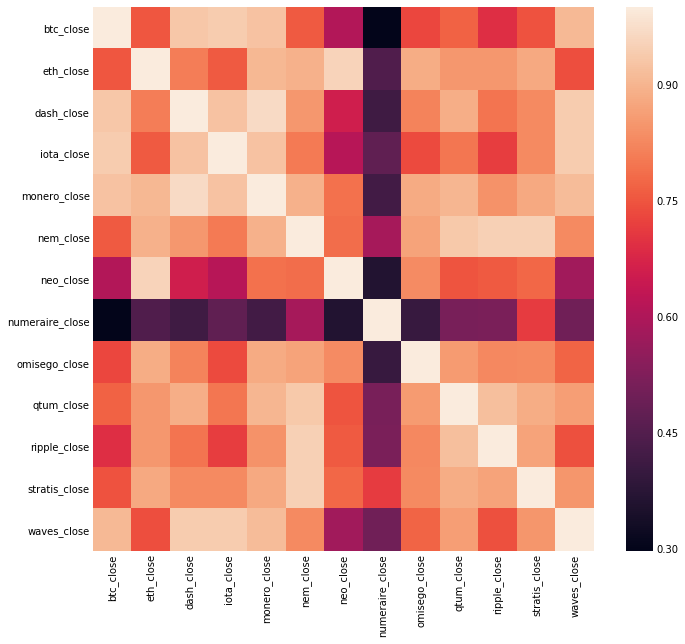

In [29]:
temp2 = temp.drop(['Date'], axis = 1)
temp2.columns
print("Correlation between Closing Values of all 13 crypto currencies:")
my_corr(temp2)

In [30]:
btc_close = btc_close.reshape(-1, 1)

tr_split = int(0.8 * btc_close.shape[0])
train = btc_close[:tr_split]
test = btc_close[tr_split:]

1.5195303058457048


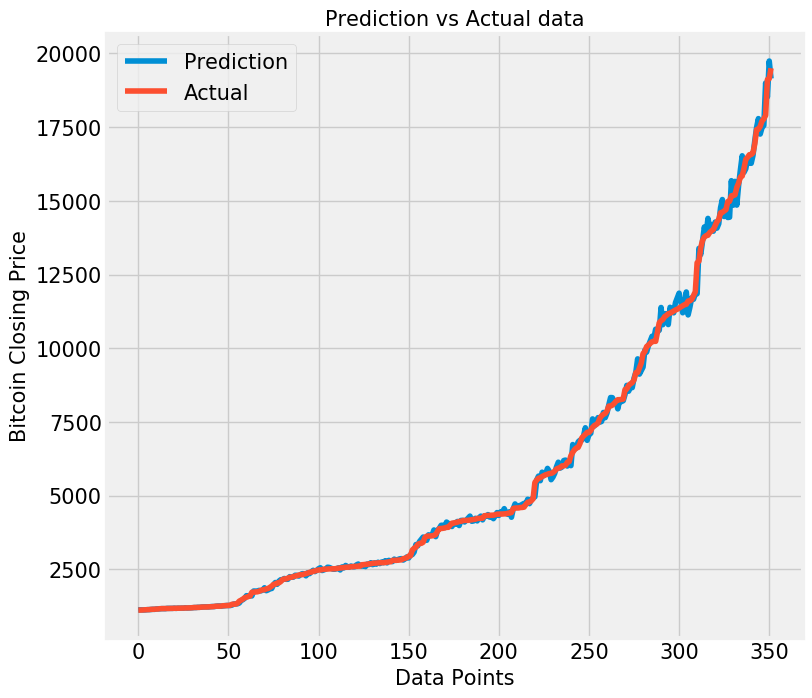

In [31]:
pred = ARmod(train, test, 400)
error(pred, test)
plot(pred, test)

0.9990082514879721


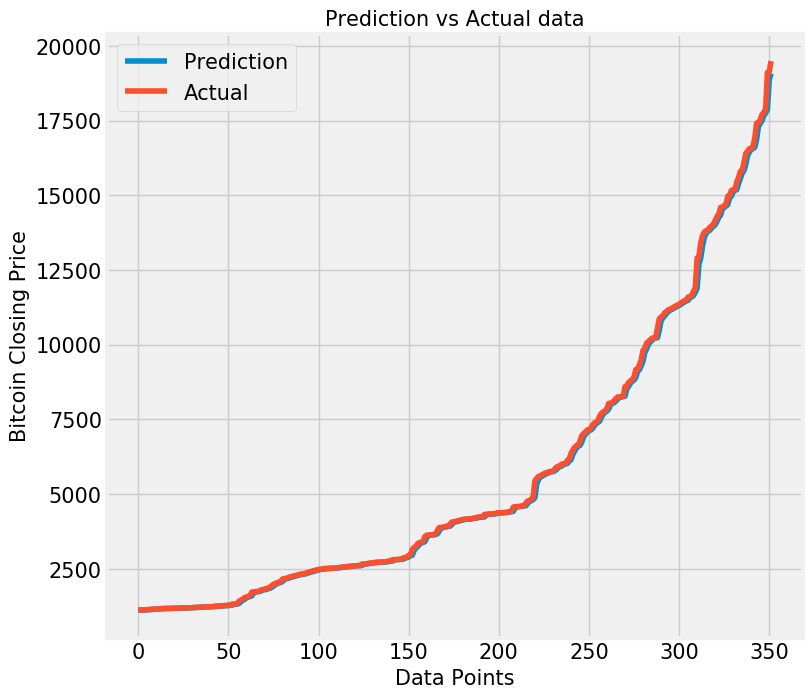

In [32]:
pred = EWMA(train, test, 0.8)
error(pred, test)
plot(pred, test)

79.86725071432517


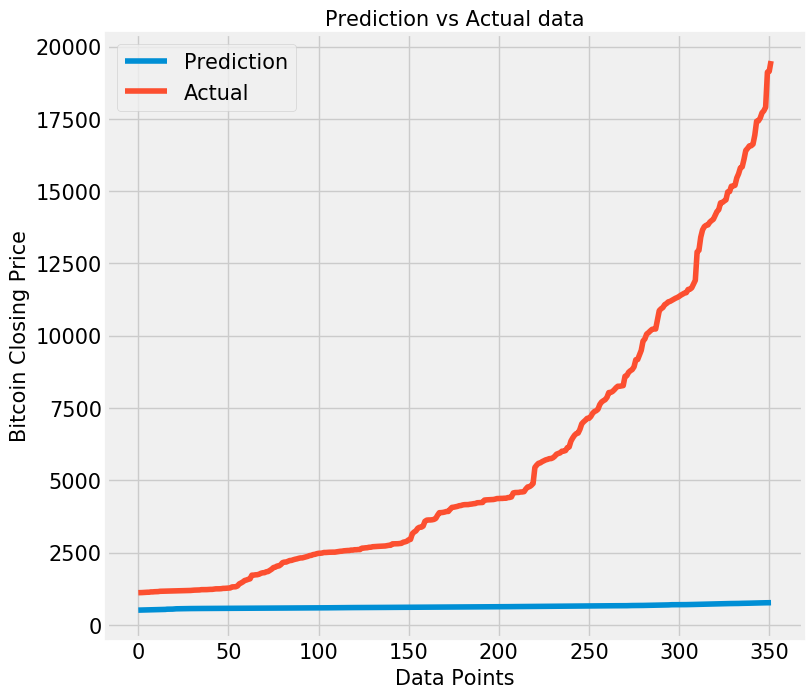

In [33]:
pred = Seasonal(train, test, 500)
error(pred, test)
plot(pred, test)

In [34]:
#Reading data from the input directory for bitcoin price
bitcoin_data = pd.read_csv('/Users/dhanashri/Documents/Probs-stats/project/dataset/cryptocurrencypricehistory/bitcoin_dataset.csv', header=0, parse_dates=['Date'])
bitcoin_data['Date'] = pd.to_datetime(bitcoin_data['Date'])
bitcoin_data.head(10)
#m
dfb = pd.DataFrame(bitcoin_data, columns=['Date', 'btc_market_price', 'btc_total_bitcoins', 'btc_market_cap', 'btc_trade_volume', 'btc_blocks_size', 'btc_avg_block_size', 'btc_n_orphaned_blocks', 'btc_n_transactions_per_block', 'btc_median_confirmation_time', 'btc_hash_rate', 'btc_difficulty', 'btc_miners_revenue', 'btc_transaction_fees', 'btc_cost_per_transaction_percent','btc_cost_per_transaction', 'btc_n_unique_addresses', 'btc_n_transactions', 'btc_n_transactions_total', 'btc_n_transactions_excluding_popular', 'btc_n_transactions_excluding_chains_longer_than_100', 'btc_output_volume', 'btc_estimated_transaction_volume', 'btc_estimated_transaction_volume_usd'])
#print(df1)
dfb1 = dfb[['Date', 'btc_market_price','btc_total_bitcoins','btc_hash_rate', 'btc_difficulty','btc_miners_revenue', 'btc_transaction_fees', 'btc_n_transactions_total', 'btc_output_volume', 'btc_estimated_transaction_volume']]
#df011=df011.rename(columns={"Close": "btc_close"})

In [35]:
temp3 = dfb1.merge(df21,on='Date')
print(temp3.head())

        Date  btc_market_price  btc_total_bitcoins  btc_hash_rate  \
0 2015-08-07            279.39          14470500.0  369025.145411   
1 2015-08-08            269.89          14474425.0  411296.569970   
2 2015-08-09            265.42          14477800.0  353662.655707   
3 2015-08-10            264.07          14482175.0  458451.590731   
4 2015-08-11            265.85          14486400.0  442733.250478   

   btc_difficulty  btc_miners_revenue  btc_transaction_fees  \
0    5.227830e+10           999936.81             29.646189   
1    5.269984e+10          1065525.72             23.042149   
2    5.269984e+10           900570.06             18.451625   
3    5.269984e+10          1162172.07             26.674039   
4    5.269984e+10          1130128.35             26.659978   

   btc_n_transactions_total  btc_output_volume  \
0                79167350.0       1.228088e+06   
1                79271770.0       1.303148e+06   
2                79360195.0       1.075398e+06   
3     

Correlation:


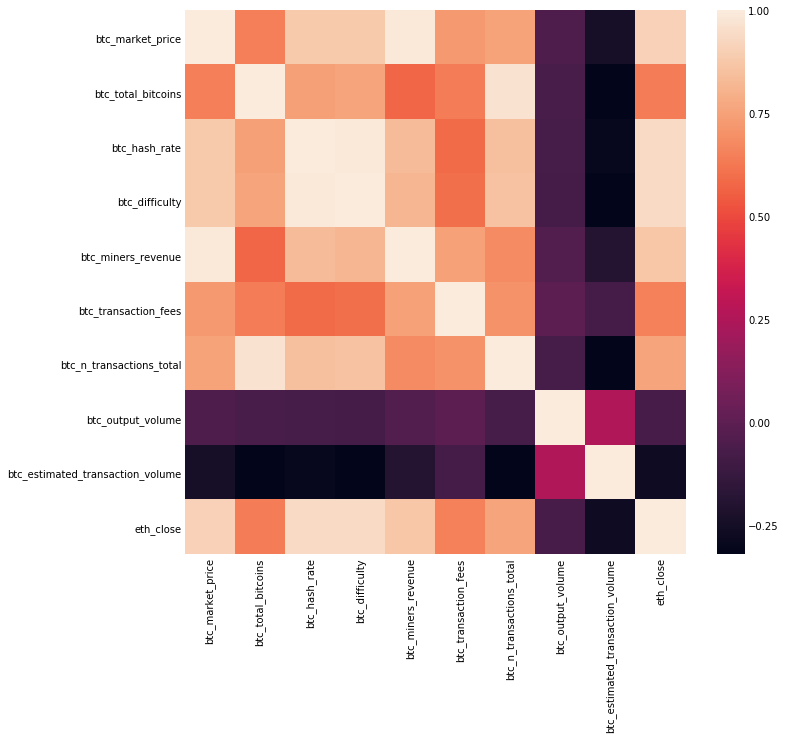

In [36]:
temp3 = temp3.drop(['Date'], axis = 1)
temp3.columns
print("Correlation:")
my_corr(temp3)

In [39]:
#Multiple Linear Regression to predict ethereum closing price based on bitcoin dataset 
#(miners_revenue, hashing_difficulty, bitcoin_market_price)

#Reading data from the input directory for ethereum price
ethereum_data = pd.read_csv('/Users/dhanashri/Documents/Probs-stats/project/dataset/cryptocurrencypricehistory/ethereum_dataset.csv', header=0, parse_dates=['Date(UTC)'])
ethereum_data['Date(UTC)'] = pd.to_datetime(ethereum_data['Date(UTC)'])
ethereum_data.head(10)
#m
dfe = pd.DataFrame(ethereum_data, columns=['Date(UTC)', 'UnixTimeStamp', 'eth_etherprice', 'eth_tx', 'eth_address', 'eth_supply', 'eth_marketcap','eth_hashrate','eth_difficulty','eth_blocks','eth_uncles','eth_blocksize','eth_blocktime','eth_gasprice','eth_gaslimit','eth_gasused','eth_ethersupply','eth_ens_register'])
#print(df1)
dfe1 = dfe[['Date(UTC)','eth_hashrate','eth_marketcap']]
dfe1=dfe1.rename(columns={"Date(UTC)": "Date"})

In [40]:
btc_mkt = np.array(temp3['btc_market_price']).reshape(-1,1)
btc_mkt.shape
btc_mr = np.array(temp3['btc_miners_revenue']).reshape(-1,1)
btc_diff = np.array(temp3['btc_difficulty']).reshape(-1,1)
eth_val = np.array(temp3['eth_close']).reshape(-1,1)
x = np.hstack((btc_mkt, btc_mr, btc_diff))

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x, eth_val, test_size=0.33, random_state=42)

In [42]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
model.score(x_test, y_test)
y_hat = model.predict(x_test)

In [44]:
model.coef_

array([[-5.21240136e-02,  2.64124509e-05,  3.55692307e-10]])

In [45]:
sse = utils.SSE(y_test, y_hat)
print("SSE:",sse)
mape = utils.MAPE(y_test, y_hat)
print("MAPE:", mape)

SSE: [1831637.40775399]
MAPE: [777.97279426]
